In [34]:
# Function to convert a string
# into it's equivalent Binary
def string_to_binary(st : str):
	return [bin(ord(i))[2:].zfill(8) for i in st]

# This is an optional function
# this is to show that our result is correct
def binary_to_string(bits):
	return ''.join([chr(int(i, 2)) for i in bits])

# Driver Code
st = str(input("Enter the message : "))

# Storing the result in variable b
# Currently the result is in list format
b = string_to_binary(st)
print(b)
# We are joining each element of the list
bt = list("".join(b))

# Printing the final Result
print("Converting the String into Binary : ",bt)

# This section is just to verify
# the result we got is correct

s = list(binary_to_string(b))
#print(s)
# Printing the result
print("The string created from the binary parts : ",s)



Enter the message :  welcome


['01110111', '01100101', '01101100', '01100011', '01101111', '01101101', '01100101']
Converting the String into Binary :  ['0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1']
The string created from the binary parts :  ['w', 'e', 'l', 'c', 'o', 'm', 'e']


In [2]:
import numpy


ak=[]
for i in range(len(bt)):
    if bt[i]=='0':
        ak.append(0)
    elif bt[i]=='1':
        ak.append(1)  

print(ak)

print(len(ak))

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
56


In [35]:
# Returns XOR of 'a' and 'b'
# (both of same length)


def xor(a, b):

	# initialize result
	result = []

	# Traverse all bits, if bits are
	# same, then XOR is 0, else 1
	for i in range(1, len(b)):
		if a[i] == b[i]:
			result.append('0')
		else:
			result.append('1')

	return ''.join(result)


# Performs Modulo-2 division
def mod2div(dividend, divisor):

	# Number of bits to be XORed at a time.
	pick = len(divisor)

	# Slicing the dividend to appropriate
	# length for particular step
	tmp = dividend[0: pick]

	while pick < len(dividend):

		if tmp[0] == '1':

			# replace the dividend by the result
			# of XOR and pull 1 bit down
			tmp = xor(divisor, tmp) + dividend[pick]

		else: # If leftmost bit is '0'
			# If the leftmost bit of the dividend (or the
			# part used in each step) is 0, the step cannot
			# use the regular divisor; we need to use an
			# all-0s divisor.
			tmp = xor('0'*pick, tmp) + dividend[pick]

		# increment pick to move further
		pick += 1

	# For the last n bits, we have to carry it out
	# normally as increased value of pick will cause
	# Index Out of Bounds.
	if tmp[0] == '1':
		tmp = xor(divisor, tmp)
	else:
		tmp = xor('0'*pick, tmp)

	checkword = tmp
	return checkword

# Function used at the sender side to encode
# data by appending remainder of modular division
# at the end of data.


def encodeData(data, key):

	l_key = len(key)

	# Appends n-1 zeroes at end of data
	appended_data = data + '0'*(l_key-1)
	remainder = mod2div(appended_data, key)

	# Append remainder in the original data
	codeword = data + remainder
	return remainder


# Driver code
data ="".join([str(x) for x in ak])
key = "1000011"
Measured_d=list(encodeData(data, key))
print("The FCS generated is :")
print(Measured_d)



The FCS generated is :
['1', '0', '1', '0', '0', '0']


In [8]:
def divbide ():
    cc=[]
    kc=[]
    fd=[]
    sd=[]
    dc=[]
    flagss=[0,1,1,1,1,1,1,0]
    ipAdsender=[1,0,1,1,0,0,1,0,1,1,1,0,1,0,1,1]
    ipAdreceiver=[1,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0]
    flagse=[0,1,1,1,1,1,1,0]
    
    CRCvalue = []
    for j in range(len(Measured_d)):
        if Measured_d[j]=='0':
            CRCvalue.append(0)
        elif Measured_d[j]=='1':
            CRCvalue.append(1)
        
    #print(CRCvalue)
    
    
    
    
    
    if (len(ak)/16)==0:
        for i in range(len(ak)//16):
            if i==0:
                for j in ak[i:16]:
                    cc.append(j)
            if i==1:
                for k in ak[i*16:32]:
                    kc.append(k)
            if i==2:
                for h in ak[i*16:48]:
                    dc.append(h)
            if i==3:
                for g in ak[i*16:48]:
                    sd.append(g)
            if i==4:
                for f in ak[i*16:64]:
                    fd.append(f)
        
                
    if (len(ak)/16)!=0:
        for i in range((len(ak)//16)+2):
            h=i*16
            if i==0:
                for j in ak[i:h+16]:
                    cc.append(j)
            if i==1:
                for k in ak[h:h+16]:
                    kc.append(k)
            if i==2:
                for h in ak[h:h+16]:
                    dc.append(h)
            if i==3:
                for g in ak[h:h+16]:
                    sd.append(g)
            if i==4:
                for f in ak[h:h+16]:
                    fd.append(f)
        
        
    
    return flagss,ipAdsender,ipAdreceiver,cc,kc,dc,sd,fd,CRCvalue,flagse

print(divbide ())

div_ided1= divbide()
# Remove empty lists from the vinay list



div_ided = [x for x in div_ided1 if x and len(x) > 0]

print(div_ided)

for l in range(len(div_ided)):
    print(div_ided[:][l])
    
    
    
print(range((len(ak)//16)+2))

new1=[]
for i in range(len(div_ided)):
    new1.append(len(div_ided[i]))
    
    
print(new1)

([0, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 1], [], [1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0])
[[0, 1, 1, 1, 1, 1, 1, 0], [1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1], [1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1], [0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0], [0, 1, 1, 1, 1, 1, 1, 0]]
[0, 1, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 0, 1, 0, 1]
[1,

In [20]:
import random
bk = [random.randint(0, 1) for i in range(len(ak))]
print(bk)

print(len(bk))

[1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
56


In [21]:
#new1=[1,1,1,1,0,1,2,4,6,0]
new=[]
for i in range(len(new1)):
    if new1[i]==0:
        pass
    if new1[i]!=0:
        new.append(new1[i])
        
print(new)

[8, 16, 16, 16, 16, 16, 8, 6, 8]


In [22]:
import numpy as np
import random
# regular expressions module
import re

# importing the QISKit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer,Aer,assemble

# import basic plot tools
from qiskit.tools.visualization import circuit_drawer, plot_histogram

 
def build_circuitMSG(num):
   

    
    
    circuit=QuantumCircuit(new[num],new[num])


    for i in range(new[num]):
        if div_ided[num][i]==1 and bk[i]==0:
            circuit.initialize([0,1],i)
        elif div_ided[num][i]==0 and bk[i]==0:
            circuit.initialize([1,0],i)
        elif div_ided[num][i]==0 and bk[i]==1:
            circuit.initialize([1/np.sqrt(2),1/np.sqrt(2)],i)
        elif div_ided[num][i]==1 and bk[i]==1:
            circuit.initialize([1/np.sqrt(2),-1/np.sqrt(2)],i)

    circuit.barrier()

    for i in range(new[num]):
        if bk[i]==1:
            circuit.h(i)
            circuit.measure(i, i)
            circuit.draw(output='mpl')
        else:
            circuit.measure(i,i)
            circuit.draw(output='mpl')

    display(circuit.draw())

            
    aer_sim = Aer.get_backend('aer_simulator')
    job = aer_sim.run(circuit)
    resultQ= job.result()  
    display(plot_histogram(job.result().get_counts()))
    kk=job.result().get_counts()

    dictionary=dict(kk)
    resultsQ=dictionary.keys()
    final_flash=list(resultsQ)
    

    return final_flash[:][0]
    

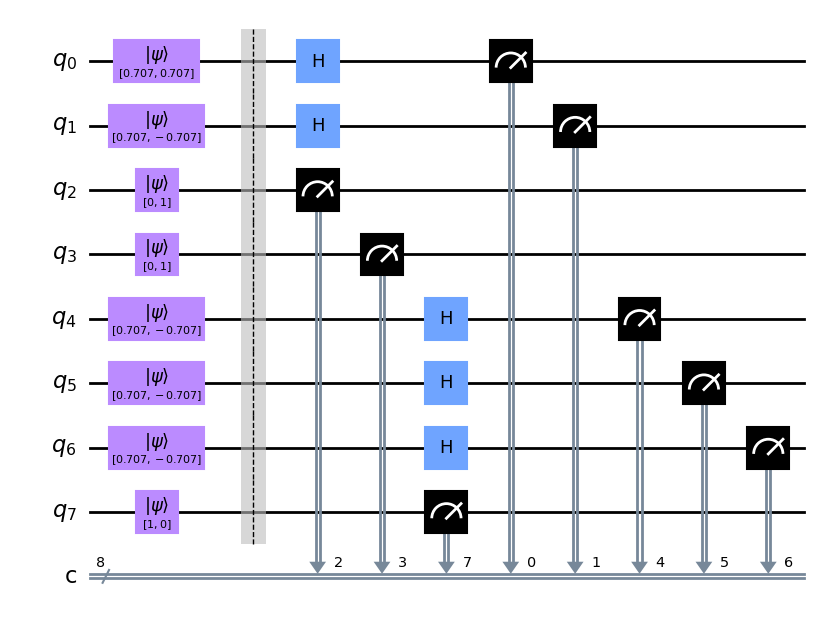

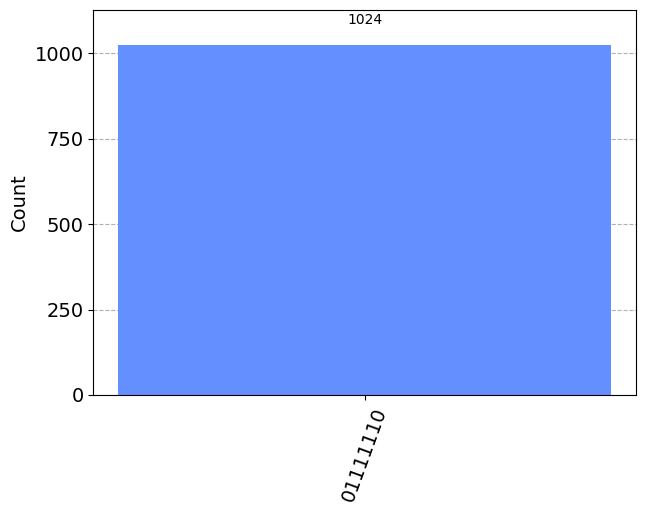

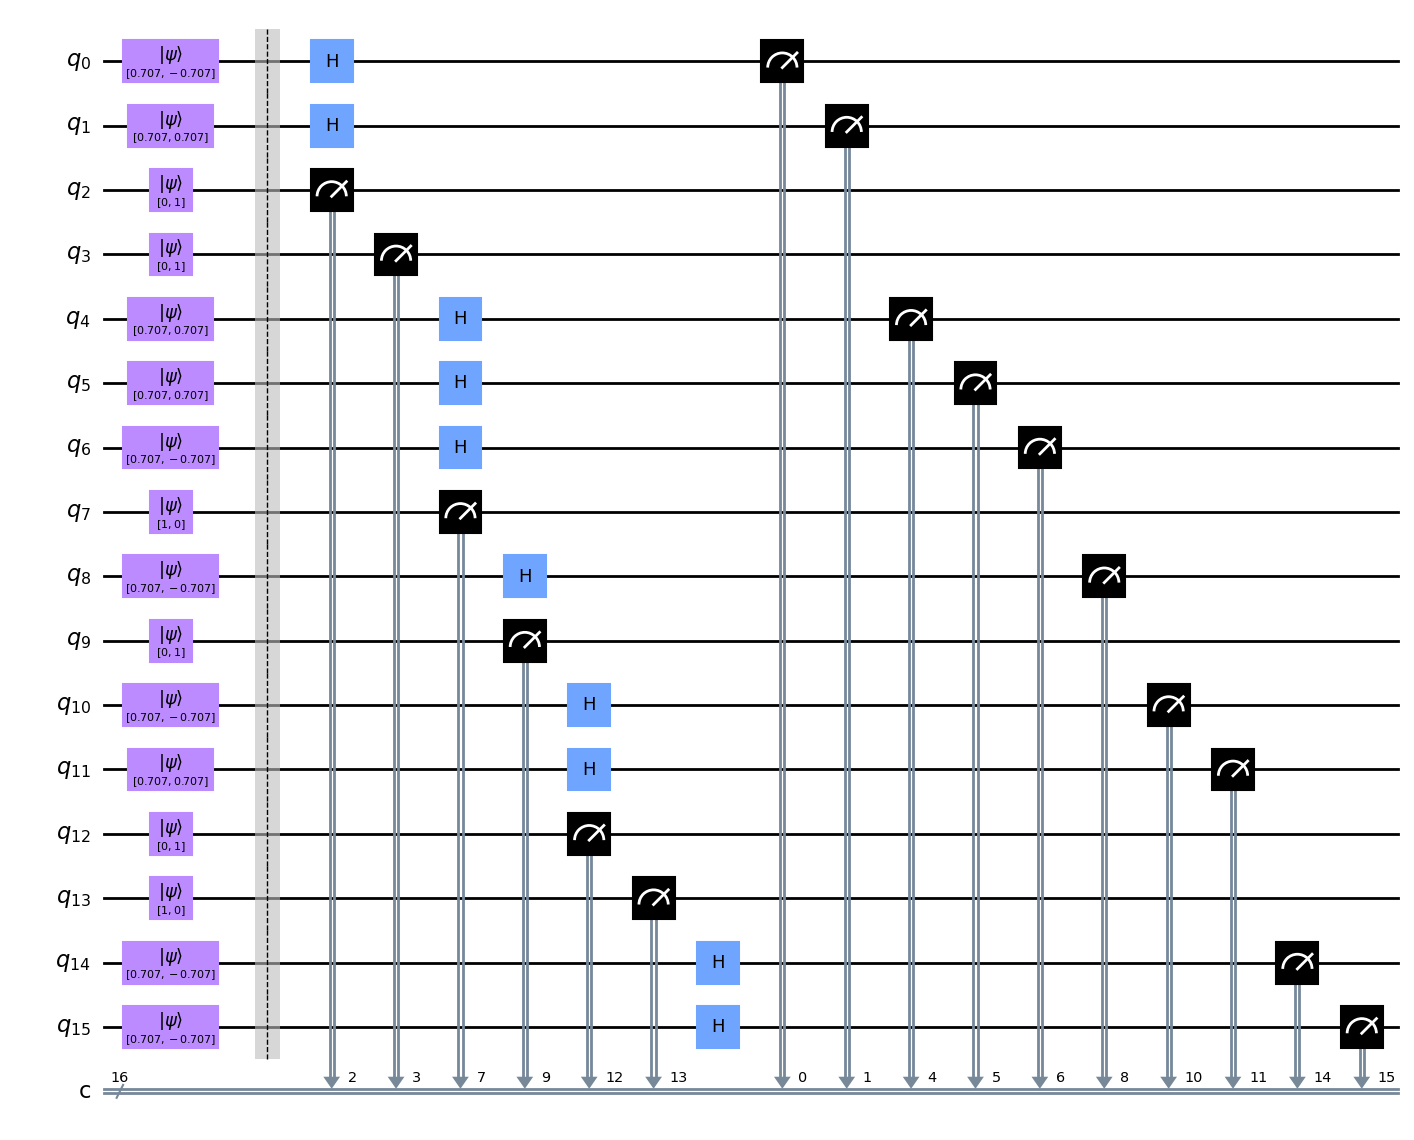

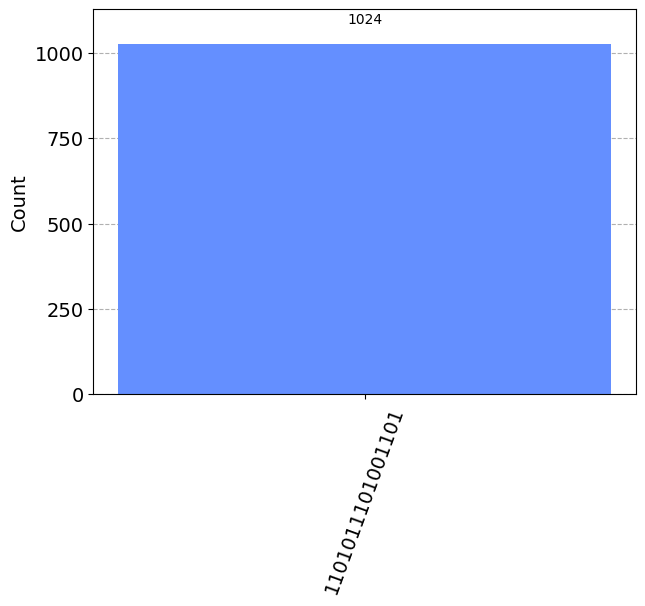

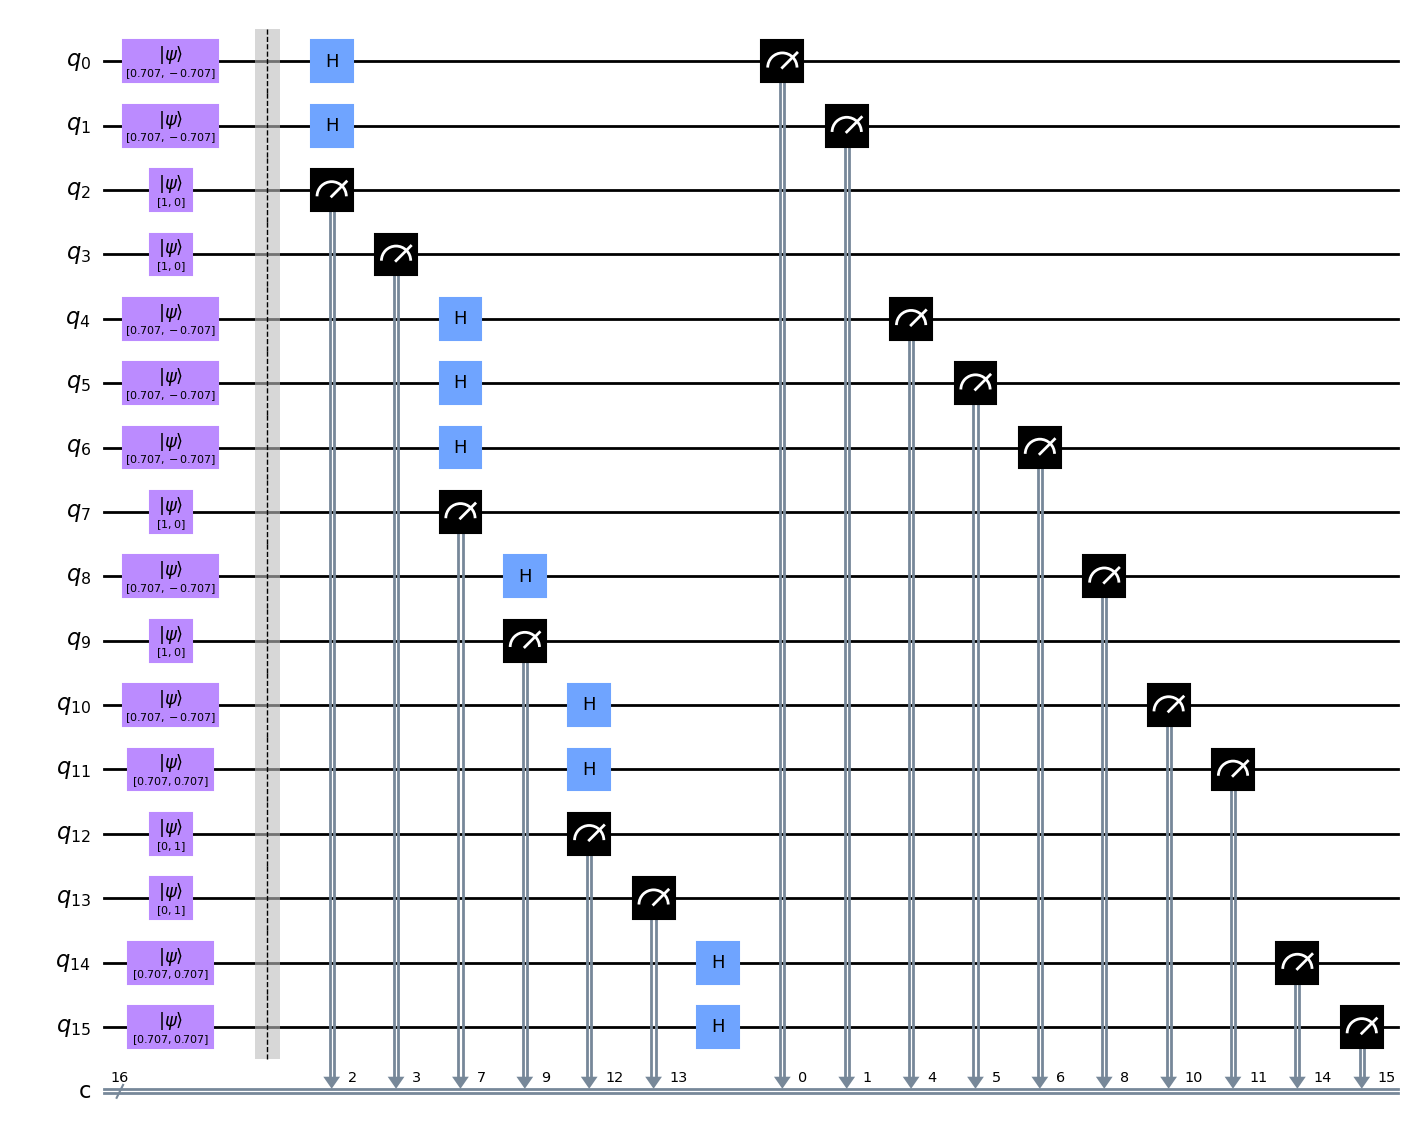

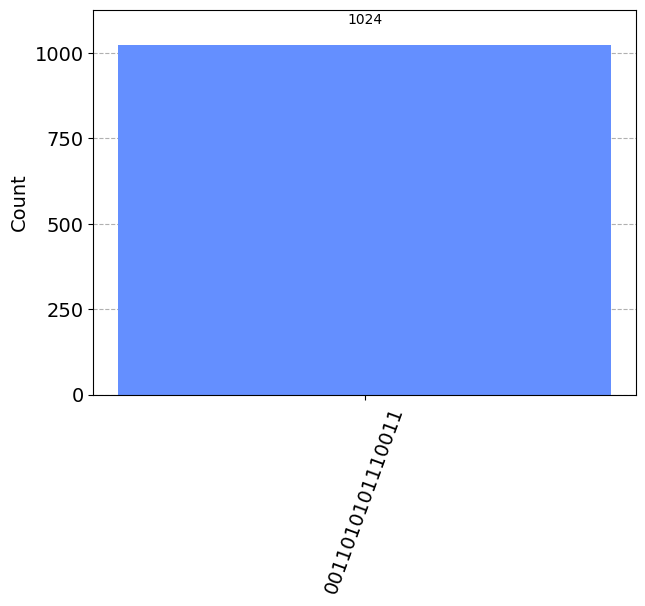

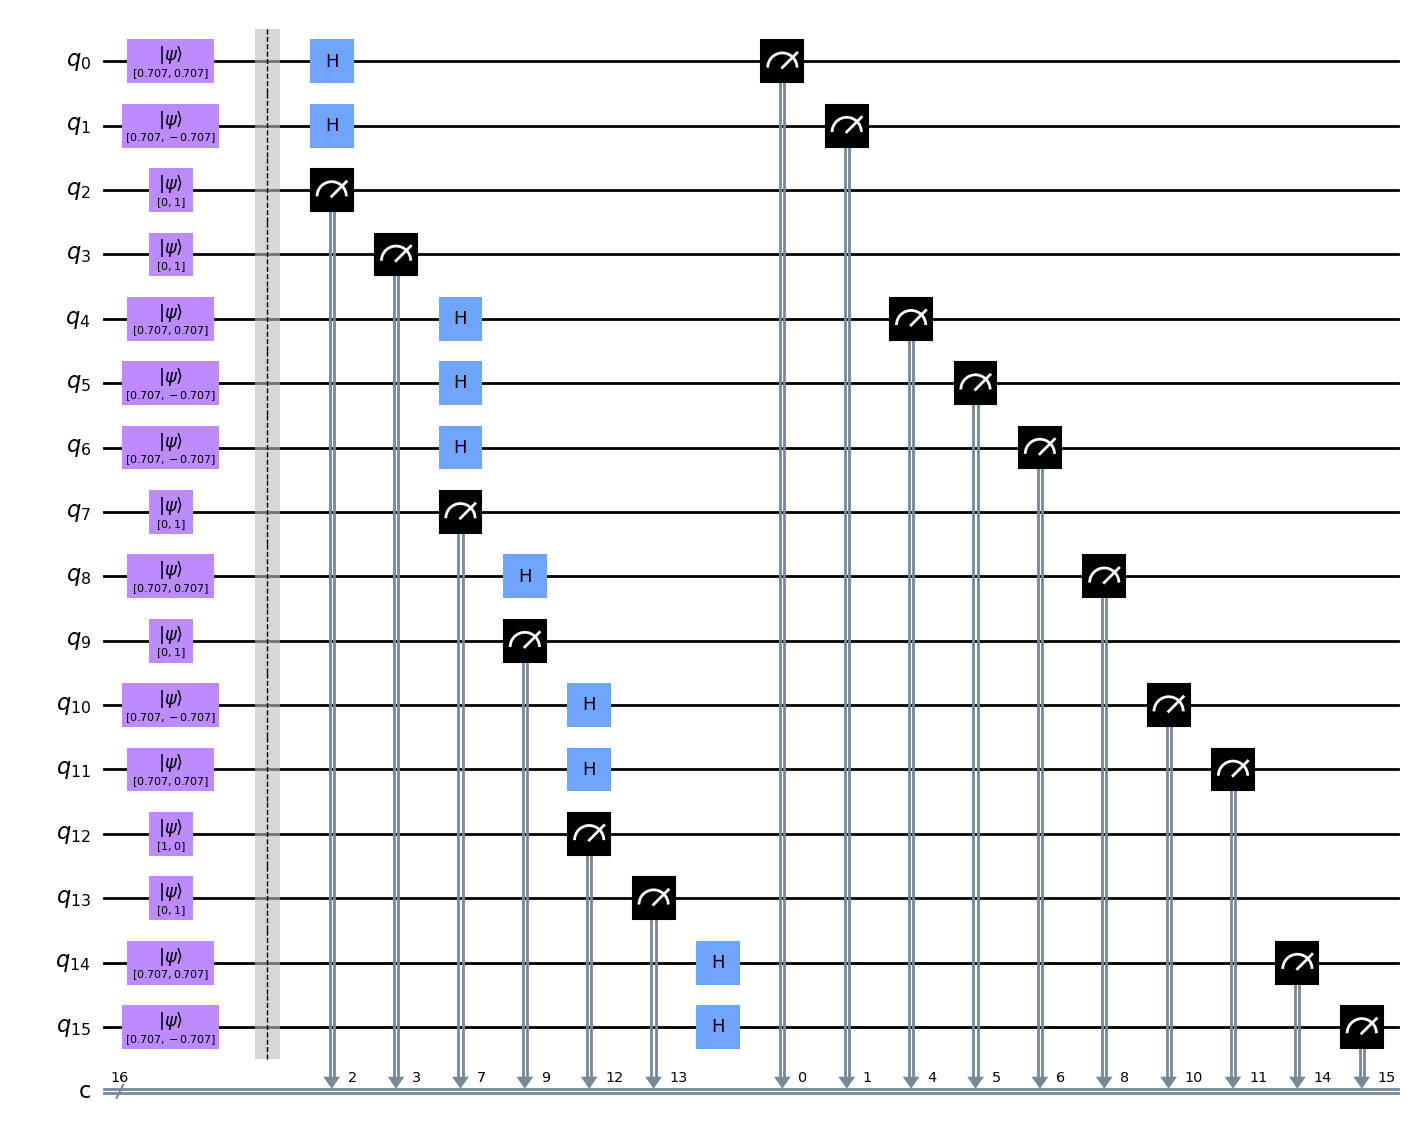

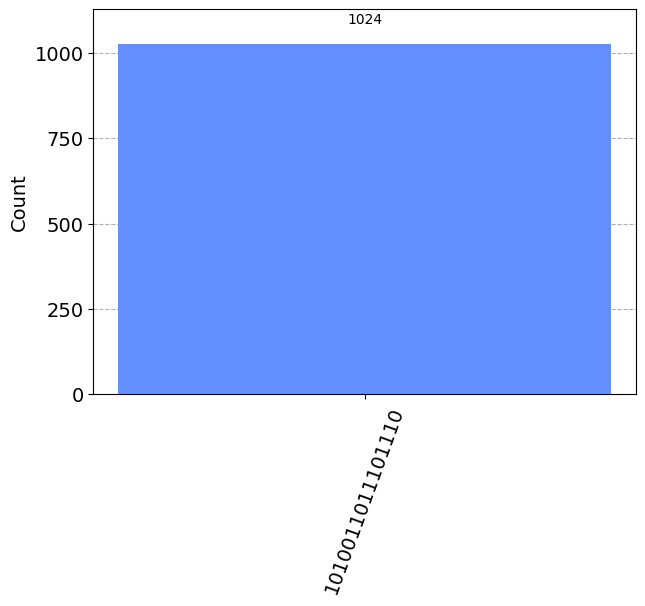

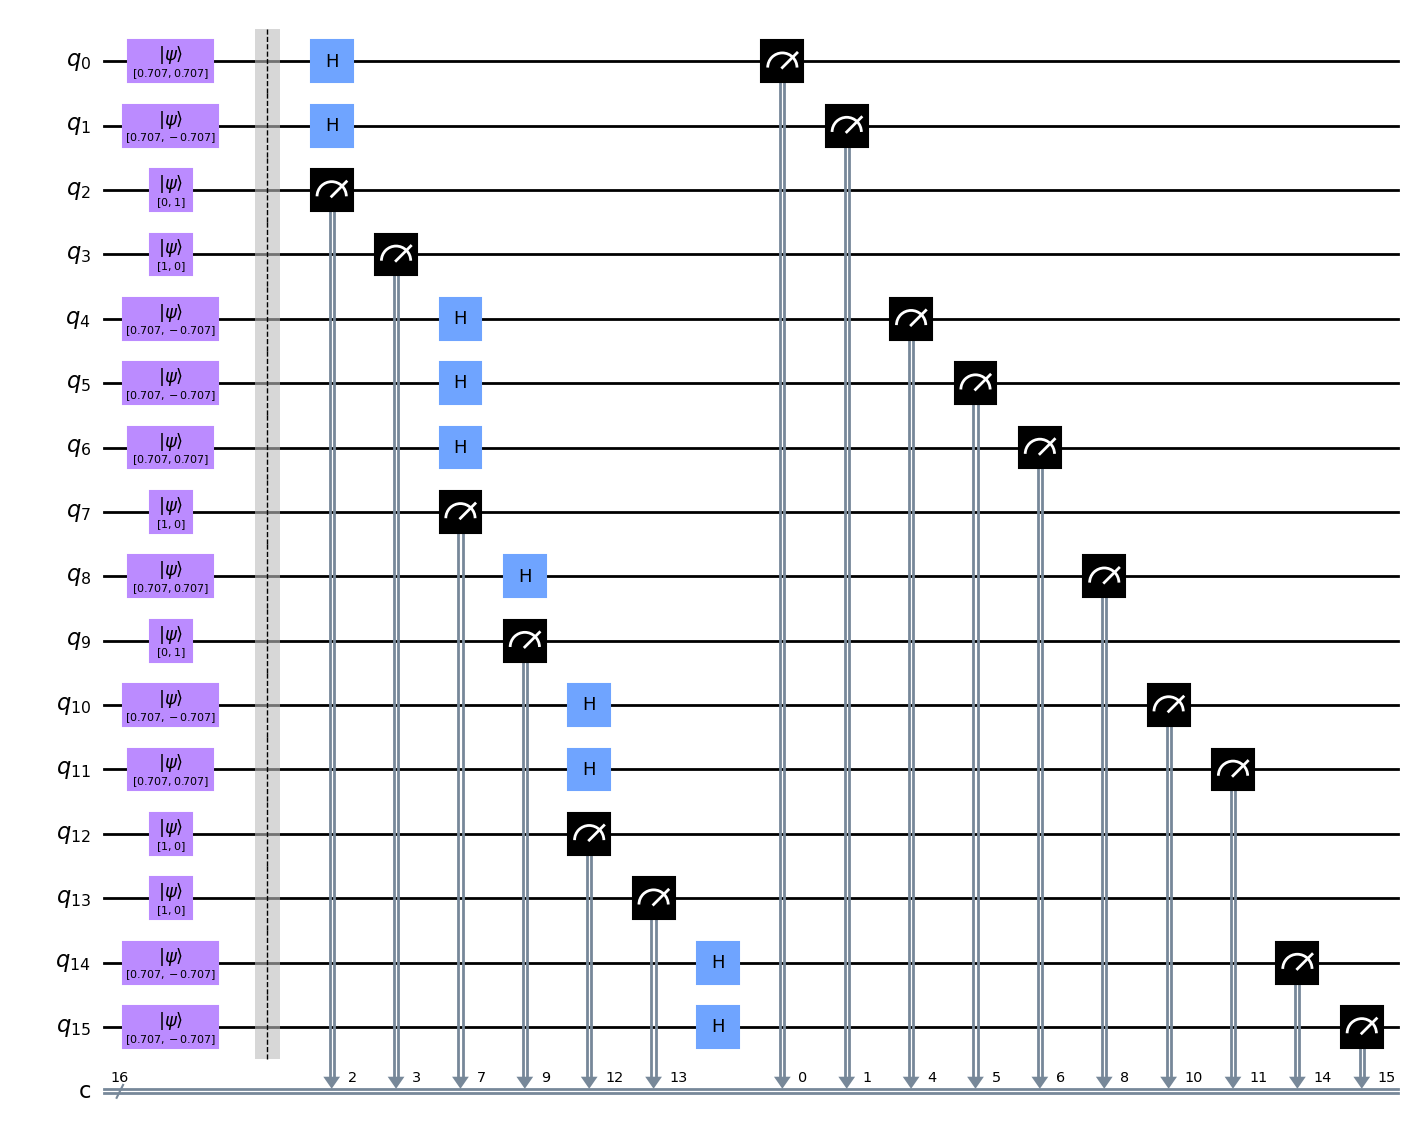

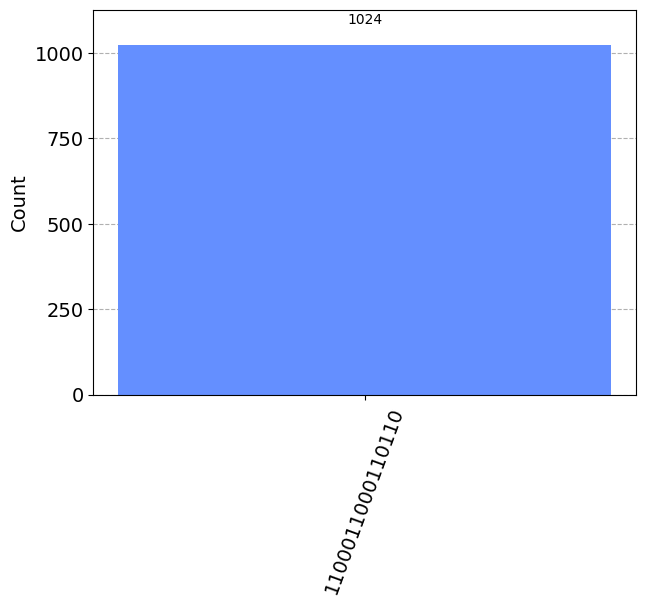

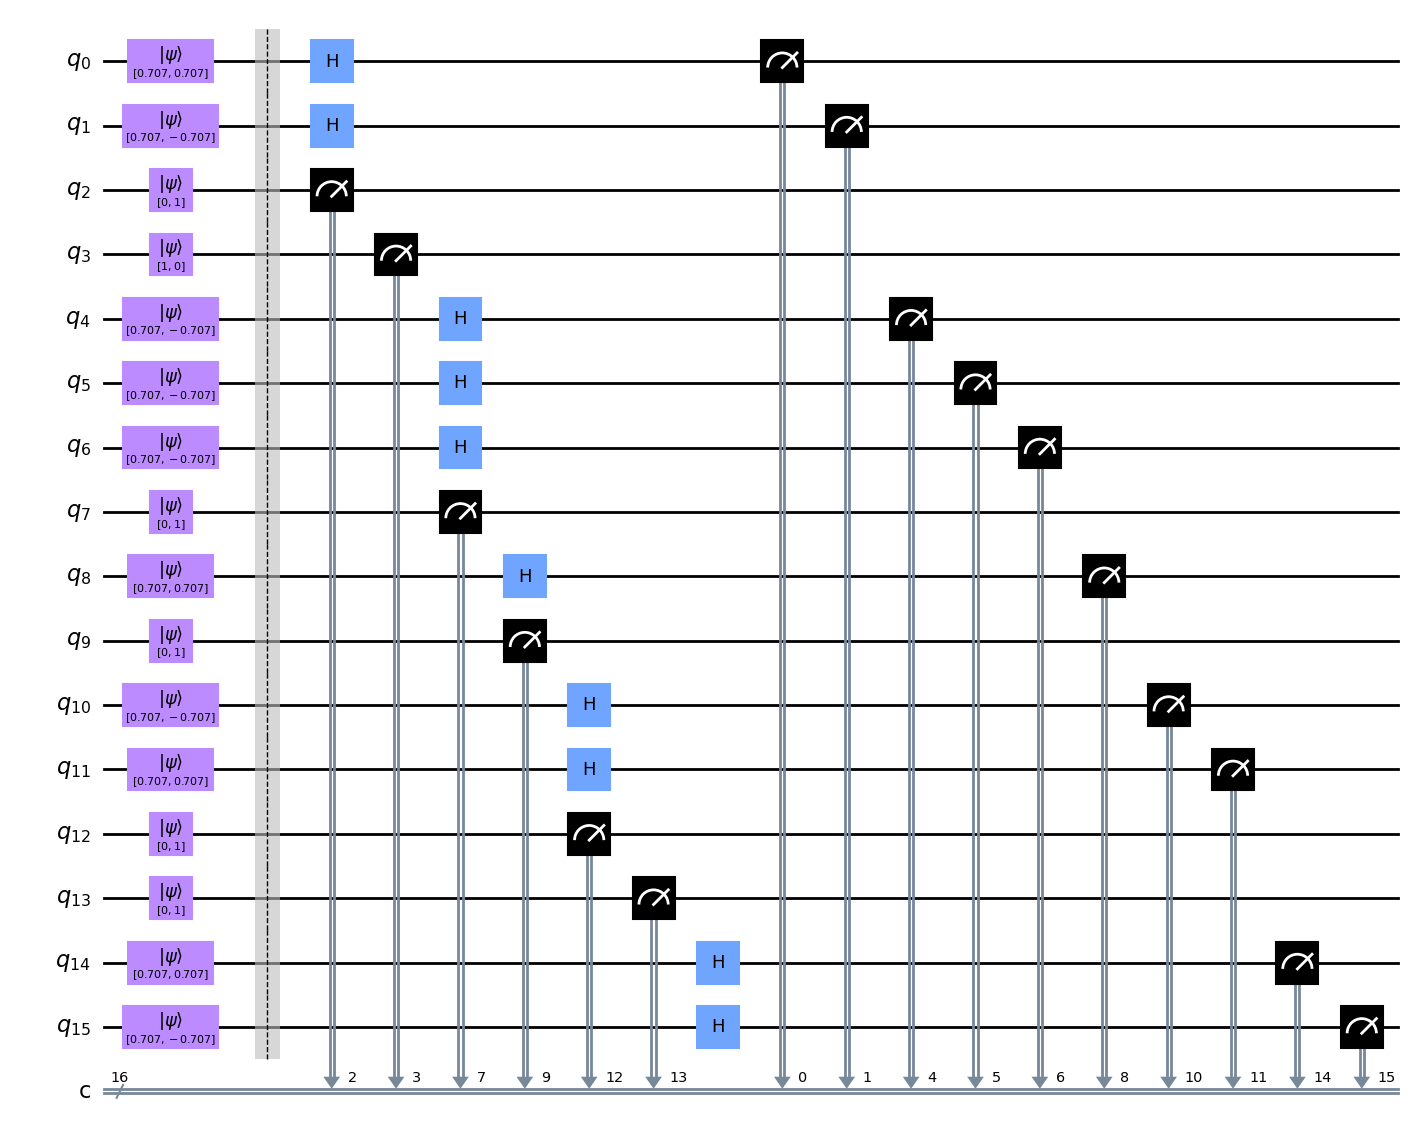

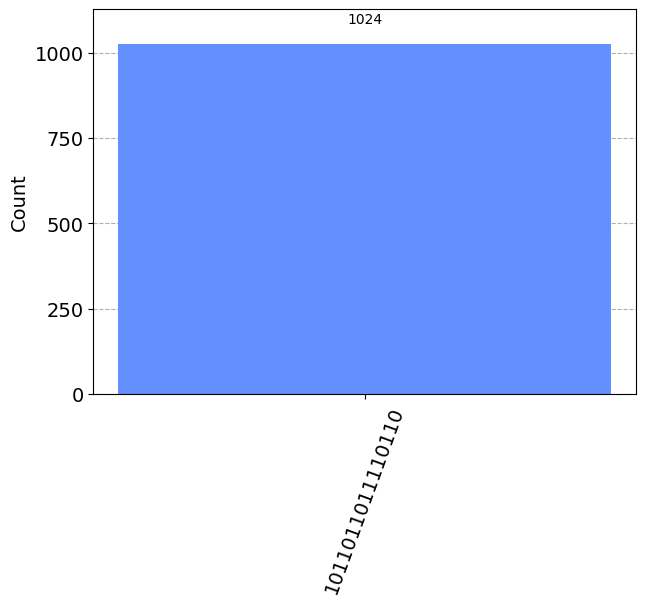

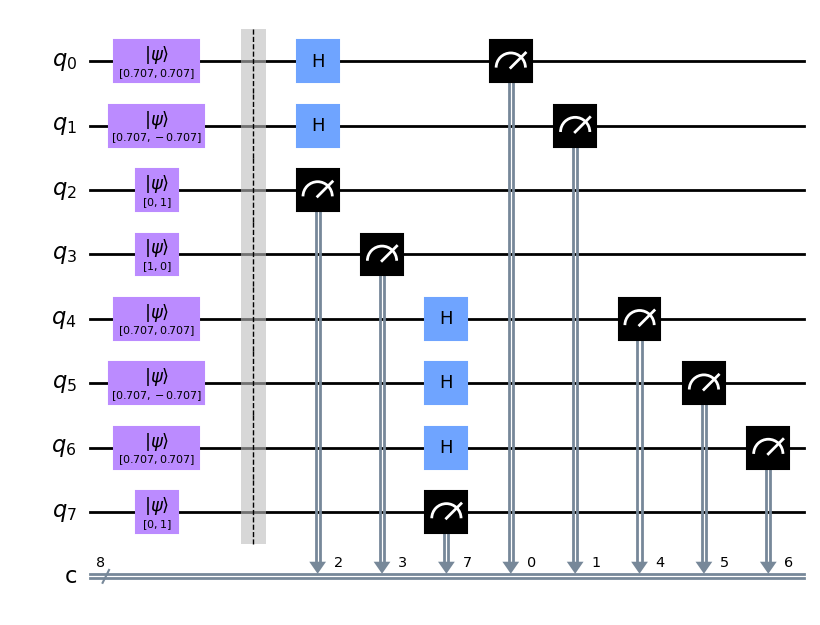

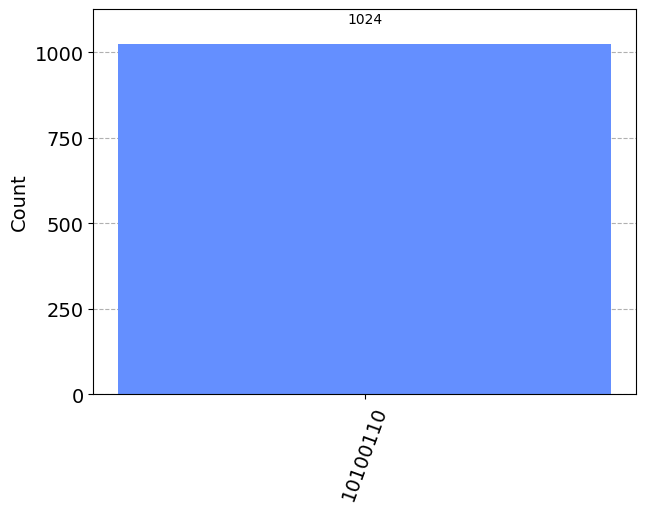

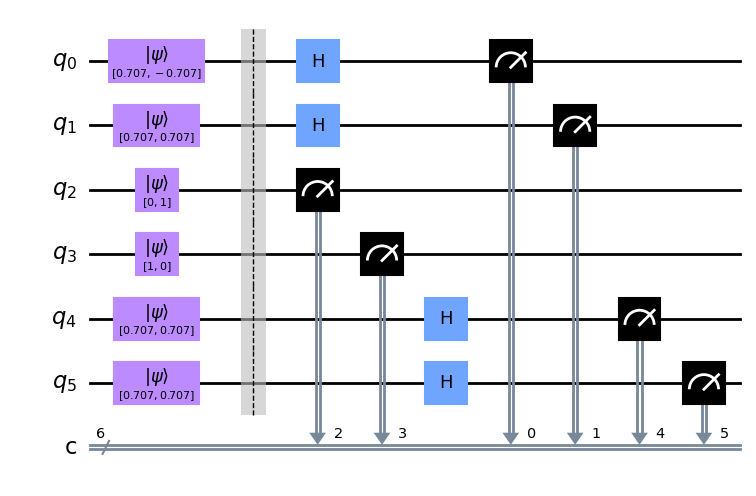

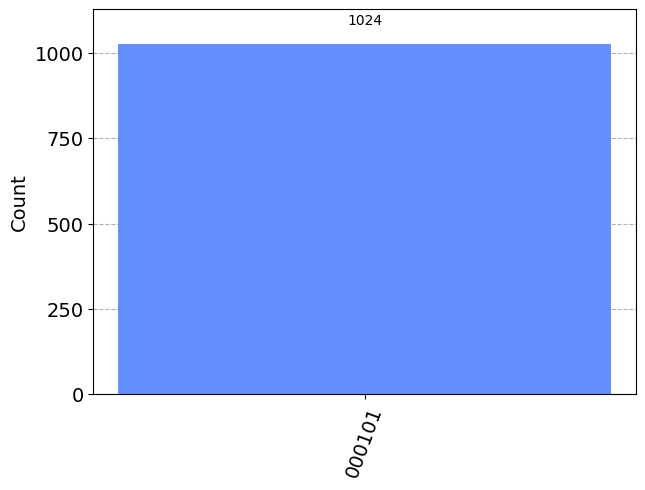

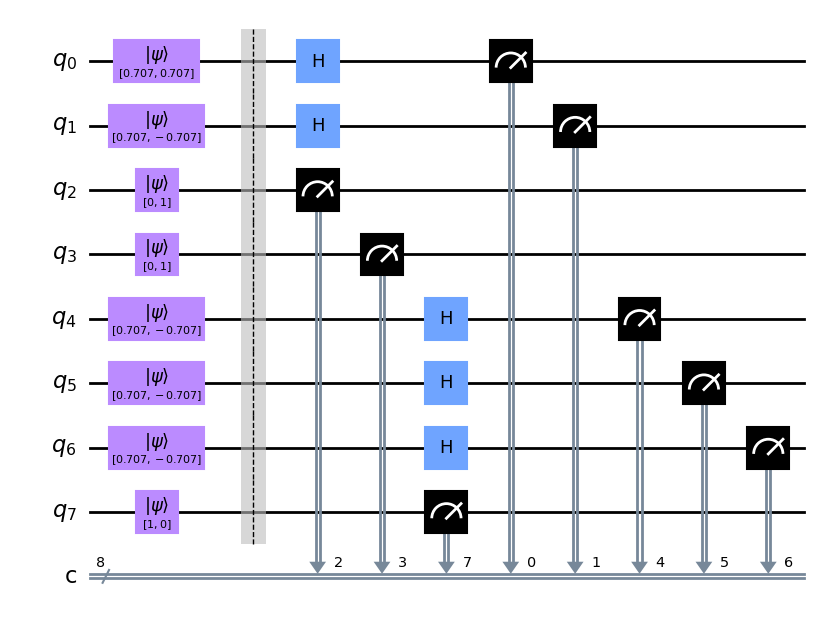

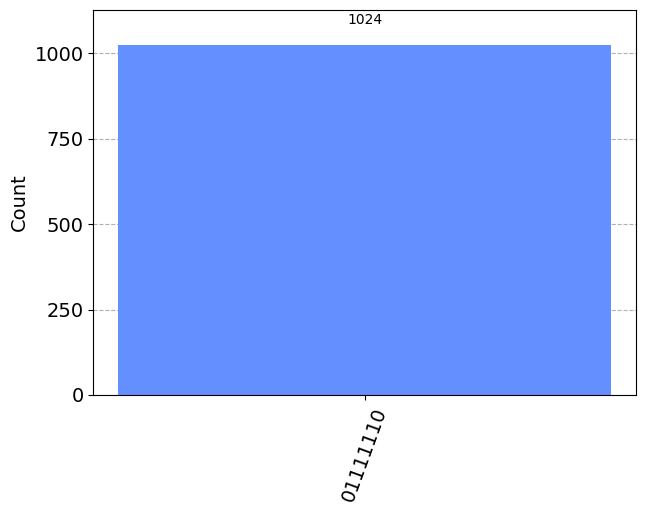

['01111110', '1101011101001101', '0011010101110011', '1010011011101110', '1100011000110110', '1011011011110110', '10100110', '000101', '01111110']


In [23]:
final=[]


for fm in range(len(new)):
    final.append(build_circuitMSG(fm))





       





print(final)

#print(final_flash)

In [29]:
import numpy
Measured_data1 = []

if ((len(bk)%16)==0):
    for i in range (len(final)):
        if (str(final[i])=='01111110') & (len(final[i])==8):
                    pass
        elif (str(final[i])=='1101011101001101') & (len(final[i])==16):
                    pass   
        elif (str(final[i])=='0011010101110011') & (len(final[i])==16):
                    pass      
        elif len(final[i])==6:
            crcChecker=[]
            for j in range(len(final[i])):
                CE=list(str(final[i]))
                if CE[j]=='0':
                    crcChecker.append(0)
                elif CE[j]=='1':
                    crcChecker.append(1)
                    
        else:       
            qq = list(final[i])
            Measured_data = []
            for j in range(len(qq)):
                if qq[j]=='0':
                    Measured_data.append(0)
                elif qq[j]=='1':
                    Measured_data.append(1)  


            Measured_data =Measured_data[::-1]
            Measured_data1 = Measured_data1 + Measured_data
            
elif((len(bk)%16)!=0):
    for i in range (len(final)):
        if (str(final[i]) == '01111110') & (len(final[i])==8):
                    pass
        elif (str(final[i])=='1101011101001101') & (len(final[i])==16):
                    pass   
        elif (str(final[i])=='0011010101110011') & (len(final[i])==16):
                    pass   
        elif len(final[i])==6:
            crcChecker=[]
            for j in range(len(final[i])):
                CE=list(str(final[i]))
                if CE[j]=='0':
                    crcChecker.append(0)
                elif CE[j]=='1':
                    crcChecker.append(1)  
        else:       
            qq = list(final[i])
            
            Measured_data = []
            for j in range(len(qq)):
                if qq[j]=='0':
                    Measured_data.append(0)
                elif qq[j]=='1':
                    Measured_data.append(1)  


            Measured_data =Measured_data[::-1]
            Measured_data1 = Measured_data1 + Measured_data 

                    
        
        




print(Measured_data1)
print(len(Measured_data1))
print(crcChecker)

[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
56
[0, 0, 0, 1, 0, 1]


In [30]:
#print(list(Measured_data1))
lkj=list(Measured_data1)
kl=list(crcChecker[::-1])

fgh=lkj.extend(kl)

print(fgh)

print(lkj)

None
[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]


In [1]:
#crcMeasured_data1=datacheck.append(list(str(final[8])))

datacheck ="".join([str(x) for x in lkj])
key = "1000011"
Measured_CRC=list(encodeData(datacheck, key))
print("reminder after division with the data is :")
print(Measured_CRC)




Traceback (most recent call last):
  Cell In[1], line 3
    datacheck ="".join([str(x) for x in lkj])
NameError: name 'lkj' is not defined

Use %tb to get the full traceback.


In [41]:

l = []
for i in range(len(Measured_data1) // 8):
    h = i * 8
    k = Measured_data1[h:h+8]
    l.append(k)

# Join the sub-lists without commas
#print(l)
receiver_message = [''.join(map(str, sub_list)) for sub_list in l]

print(receiver_message)


vinay=Measured_data1[:]

#kale="".join([str(x) for x in vinay])
#print(kale)

received_message = binary_to_string(receiver_message)

# Printing the result
print("message received from the sender is : ",received_message)

['01110111', '01100101', '01101100', '01100011', '01101111', '01101101', '01100101']
message received from the sender is :  welcome


In [33]:
received_message = binary_to_string(receiver_message)

# Printing the result
print("message received from the sender is : ",received_message)

message received from the sender is :  welcome
